## Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from wrangle import acquire, prepare, split, get_the_weights, get_the_coef, prep_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Acquiring data from local file

In [2]:
credit = acquire()

## Preparing the data

In [3]:
credit = prepare(credit)

## Splitting the data

In [4]:
train, validate, test = split(credit)

## Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7897 to 9853
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   churn                       5670 non-null   int64   
 1   age                         5670 non-null   int64   
 2   gender                      5670 non-null   object  
 3   dependents                  5670 non-null   int64   
 4   education                   5670 non-null   object  
 5   marital_status              5670 non-null   object  
 6   income                      5670 non-null   object  
 7   card_type                   5670 non-null   object  
 8   tenure                      5670 non-null   int64   
 9   products_used               5670 non-null   int64   
 10  inactive_months_past_year   5670 non-null   int64   
 11  contacted_past_year         5670 non-null   int64   
 12  credit_limit                5670 non-null   float64 
 13  revolving_bal_t

## Univariate

<AxesSubplot:>

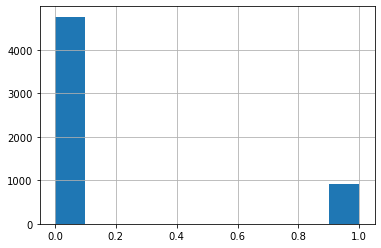

In [6]:
# Churn distribution

train.churn.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean       46.414638
 std         8.043652
 min        26.000000
 25%        41.000000
 50%        46.000000
 75%        52.000000
 max        70.000000
 Name: age, dtype: float64)

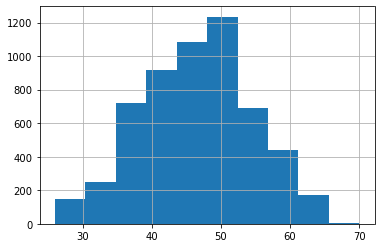

In [7]:
# Age distribution

train.age.hist(), train.age.describe()

<AxesSubplot:>

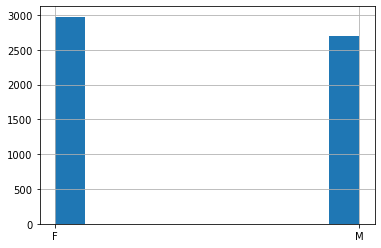

In [8]:
# Gender distribution

train.gender.hist()

<AxesSubplot:>

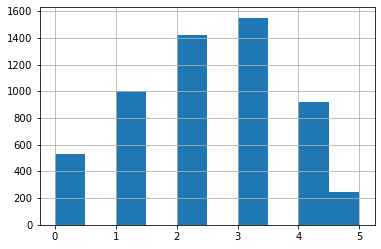

In [9]:
# Dependents distribution

train.dependents.hist()

<AxesSubplot:>

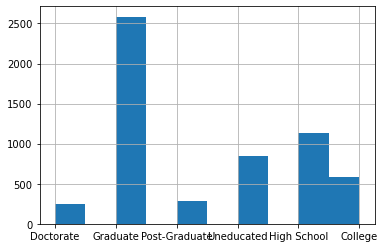

In [10]:
# Education distribution

train.education.hist()

<AxesSubplot:>

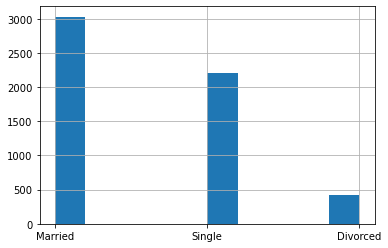

In [11]:
# Marital status distribution

train.marital_status.hist()

<AxesSubplot:>

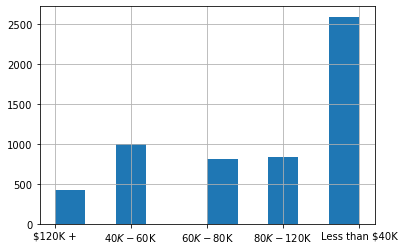

In [12]:
# Income distribution

train.sort_values('income').income.hist()

<AxesSubplot:>

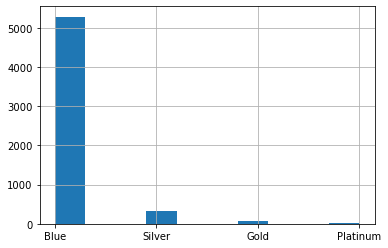

In [13]:
# Card type distribution

train.card_type.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean       35.986243
 std         8.055121
 min        13.000000
 25%        32.000000
 50%        36.000000
 75%        40.000000
 max        56.000000
 Name: tenure, dtype: float64)

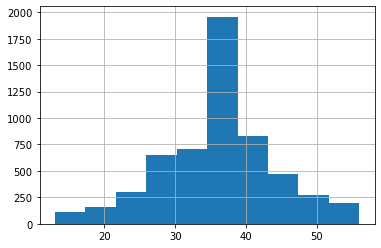

In [14]:
# Distribution of months with the bank

train.tenure.hist(), train.tenure.describe()

<AxesSubplot:>

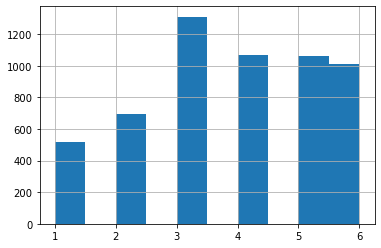

In [15]:
# Distribution of number of products used by customers

train.products_used.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean        2.345150
 std         1.000048
 min         0.000000
 25%         2.000000
 50%         2.000000
 75%         3.000000
 max         6.000000
 Name: inactive_months_past_year, dtype: float64)

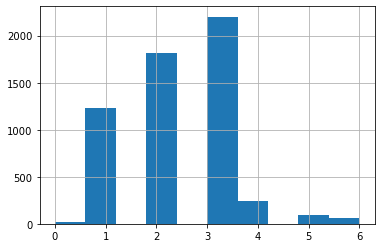

In [16]:
# Distribution of number of months inactive in the past year

train.inactive_months_past_year.hist(), train.inactive_months_past_year.describe()

<AxesSubplot:>

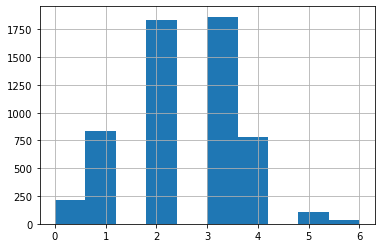

In [17]:
# Distribution of times contacting the bank in the past year

train.contacted_past_year.hist()

<AxesSubplot:>

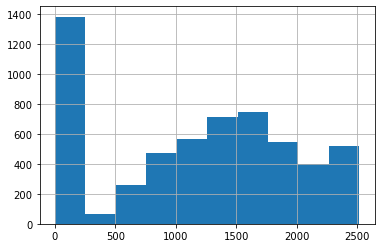

In [18]:
# Total revolving balance distribution, might be useful to bin these

train.revolving_bal_tot.hist()

<AxesSubplot:>

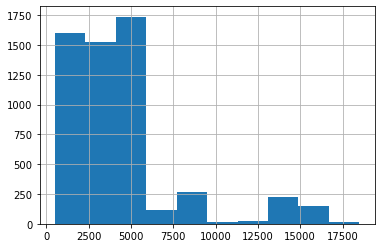

In [19]:
# Total transaction amount distribution

train.tot_trans_amt.hist()

<AxesSubplot:>

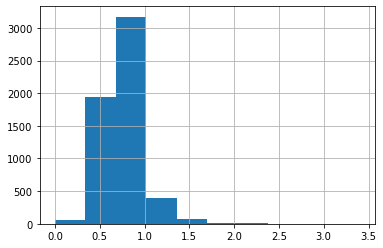

In [20]:
# Change in spending from Q4 to Q1 distribution (Calculated Q4/Q1)

train.trans_amt_chng_q4_q1.hist()

<AxesSubplot:>

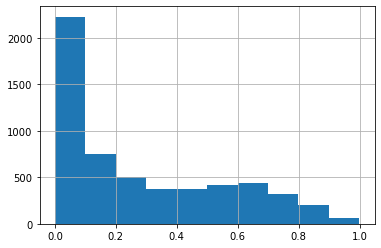

In [21]:
# Distribution of average utilization ratio (Credit used/ Available credit)

train.avg_card_utilization_ratio.hist()

## Bivariate

(<AxesSubplot:xlabel='income', ylabel='count'>,
 income
 $120K +           0.159251
 $40K - $60K       0.155779
 $60K - $80K       0.140394
 $80K - $120K      0.145238
 Less than $40K    0.174114
 Name: churn, dtype: float64)

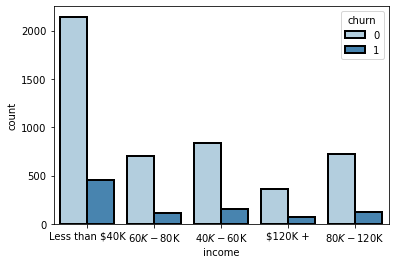

In [22]:
# Count of churned customers by income group, churn ratios on top
# Churned cutomers ratio is pretty even for each income bracket

sns.countplot(x = 'income', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('income').churn.mean()

(<AxesSubplot:xlabel='inactive_months_past_year', ylabel='count'>,
 inactive_months_past_year
 0    0.411765
 1    0.046229
 2    0.156130
 3    0.211268
 4    0.311203
 5    0.136842
 6    0.156250
 Name: churn, dtype: float64,
 0.16067019400352733)

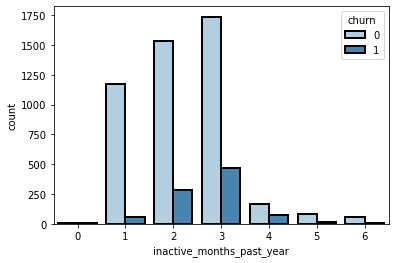

In [23]:
# Count of churned customers by number of months they were inactive last year, churn ratios by inactive months, 
# with total average churn on the bottom
# Seems as though there is a directly proportional relationship between inactive months and churn 
# however drops off after 4 months

sns.countplot(x = 'inactive_months_past_year', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('inactive_months_past_year').churn.mean(), train.churn.sum()/5670

<AxesSubplot:xlabel='tenure', ylabel='churn'>

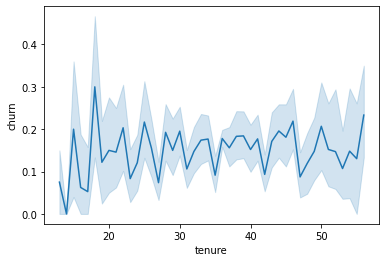

In [24]:
# Plotting tenure with churn frequency
# More varied in the first few months but then starts to even out

sns.lineplot(x = 'tenure', y = 'churn', data = train)

(<AxesSubplot:xlabel='card_type', ylabel='count'>,
 card_type
 Blue        0.162505
 Gold        0.101695
 Platinum    0.222222
 Silver      0.139241
 Name: churn, dtype: float64)

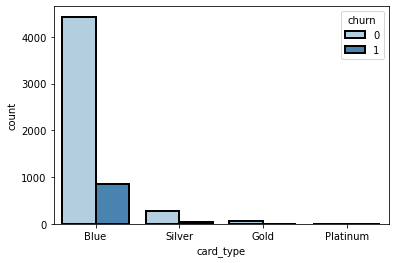

In [25]:
# Churn count grouped by the type of card the customer has, churn ratios on top

sns.countplot(x = 'card_type', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('card_type').churn.mean()

<AxesSubplot:xlabel='dependents', ylabel='count'>

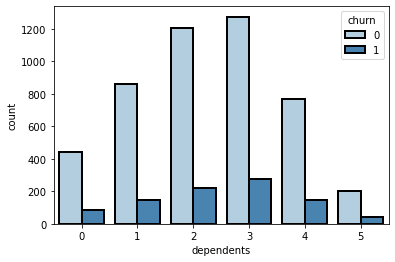

In [26]:
# Churn count grouped by the number of dependents 

sns.countplot(x = 'dependents', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2)

(<AxesSubplot:xlabel='education', ylabel='count'>,
 education
 College          0.153713
 Doctorate        0.202479
 Graduate         0.158282
 High School      0.153914
 Post-Graduate    0.185315
 Uneducated       0.161520
 Name: churn, dtype: float64)

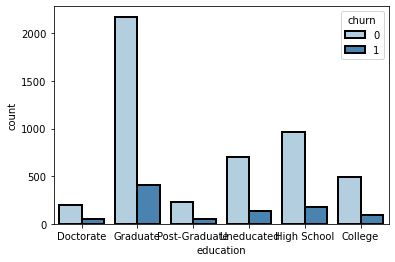

In [27]:
# Churn counts grouped by education level, churn ratios on top

sns.countplot(x = 'education', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('education').churn.mean()

(<AxesSubplot:xlabel='revolving_bal_bin', ylabel='count'>,
 revolving_bal_bin
 0              0.373626
 1 - 1000       0.184769
 1000 - 2000    0.047210
 2000+          0.140276
 Name: churn, dtype: float64)

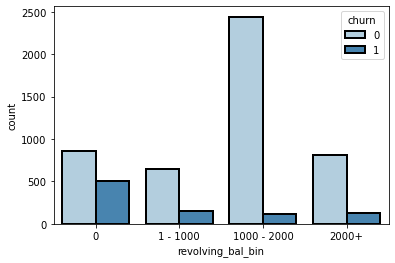

In [28]:
# Churn counts grouped by revolving balance, churn ratios on top
# It seems those with lower revolving balances were more likely to churn, especially those with none

sns.countplot(x = 'revolving_bal_bin', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('revolving_bal_bin').churn.mean()

(<AxesSubplot:xlabel='age_bin', ylabel='count'>,
 age_bin
 20-30    0.110345
 30-40    0.147708
 40-50    0.168138
 50-60    0.159603
 60+      0.181034
 Name: churn, dtype: float64)

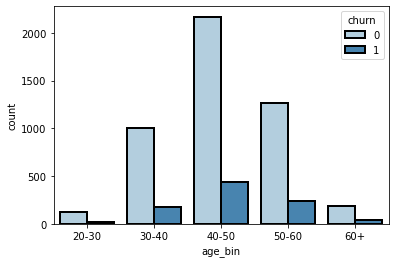

In [29]:
# Churn counts grouped by age, churn ratios on top

sns.countplot(x = 'age_bin', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('age_bin').churn.mean()

(<AxesSubplot:xlabel='card_util_bin', ylabel='count'>,
 card_util_bin
 0-20%      0.225418
 20-40%     0.104119
 40-60%     0.052304
 60-80%     0.073628
 80-100%    0.191406
 Name: churn, dtype: float64)

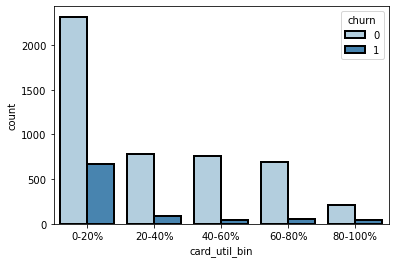

In [30]:
# Churn counts grouped by card utility, churn ratios on top
# This further implies that our customers who use the least amount of credit are most likely to churn, but 
# also those maxing out their credit seem more likely to churn

sns.countplot(x = 'card_util_bin', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('card_util_bin').churn.mean()

(<AxesSubplot:xlabel='products_used', ylabel='count'>,
 products_used
 1    0.260618
 2    0.275072
 3    0.170099
 4    0.114125
 5    0.123120
 6    0.106931
 Name: churn, dtype: float64)

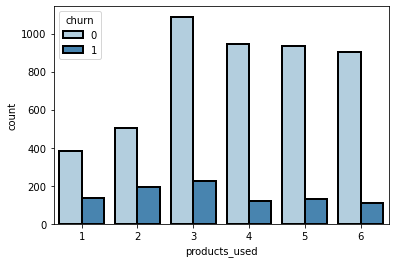

In [31]:
# Churn counts grouped by number of products used, churn ratios on top
# Seems those that use less of the banks services are more likely to churn

sns.countplot(x = 'products_used', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('products_used').churn.mean()

(<AxesSubplot:xlabel='contacted_past_year', ylabel='count'>,
 contacted_past_year
 0    0.027523
 1    0.071770
 2    0.128345
 3    0.195279
 4    0.227506
 5    0.321101
 6    1.000000
 Name: churn, dtype: float64)

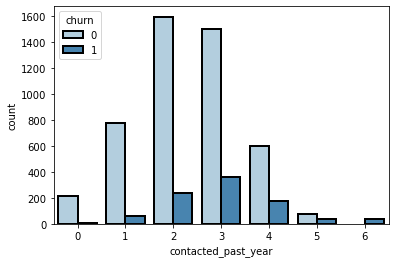

In [32]:
# Churn counts grouped by number of times bank was contacted in the past year, churn ratios on top
# Contacts seem to be highly correlated with churn, though that's not much of a surprise

sns.countplot(x = 'contacted_past_year', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('contacted_past_year').churn.mean()

<AxesSubplot:xlabel='total_trans_ct', ylabel='Count'>

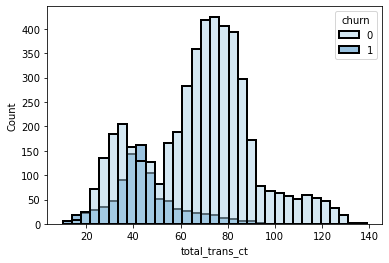

In [33]:
# Churn counts grouped by total number of transactions
# Seems the lower transaction cards were more likely to churn

sns.histplot(x = 'total_trans_ct', hue = 'churn', data=train, palette='Blues', linewidth=2)

## Testing

### Hypothesis 1

Null: There is no difference in average contact number between those that have churned and those that have not

Alternative: There is a difference in average contact number between those that have churned and those that have not

Alpha = .05

In [34]:
churned = train[train['churn'] == 1]
active = train[train['churn'] == 0]

stats.ttest_ind(churned.contacted_past_year, active.contacted_past_year)

Ttest_indResult(statistic=15.525671780892413, pvalue=2.87060033269925e-53)

I can safely conclude that there is likely a difference in the average contact number between those that have churned and those that are still active customers

### Hypothesis 2

Null: There is no difference in the average number of inactive months between those that have churned and those that have not

Alternative: There is a difference in the average number of inactive months between those that have churned and those that have not

In [35]:
stats.ttest_ind(churned.inactive_months_past_year, active.inactive_months_past_year)

Ttest_indResult(statistic=11.282086441512252, pvalue=3.2892656261879736e-29)

I can safely conclude that these two groups are likely not independent when it comes to number of inactive months in the past year

### Hypothesis 3

Null: There is no difference in the average number of products used between those that have churned and those that have not

Alternative: There is a difference in the average number of products used between those that have churned and those that have not

In [36]:
stats.mannwhitneyu(churned.products_used, active.products_used)

MannwhitneyuResult(statistic=1675904.0, pvalue=1.0391415612358465e-28)

I can safely conclude that there is likely a difference in the average number of products used between those that have churned and those that have not

## Preparing for modeling

In [37]:
# Dropping columns for marital status, card type, income, credit limit, gender, dependents, average open to buy,
# age, tenure, and education as it was revealed in examining the weights of each feature that these were all ranked 
# as irrelevant, dropping binned columns

credit = prep_model(credit)

In [38]:
train, validate, test = split(credit)

## Modeling

In [39]:
x_train = train.drop(columns = ['churn'])
y_train = train.churn

x_validate = validate.drop(columns = ['churn'])
y_validate = validate.churn

x_test = test.drop(columns = ['churn'])
y_test = test.churn

## Establishing a baseline

In [40]:
train.groupby('churn').count()

,products_used,inactive_months_past_year,contacted_past_year,revolving_bal_tot,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio
churn,,,,,,,,,
0,4759,4759,4759,4759,4759,4759,4759,4759,4759
1,911,911,911,911,911,911,911,911,911


In [41]:
# Calculating the baseline

print(f'Baseline     = {(4759/(4759 + 911)):.4f}')

Baseline     = 0.8393


## Decision Tree max depth of 5

In [42]:
# Creating the decision tree

dt5 = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fitting the decision tree

dt5 = dt5.fit(x_train, y_train)

# Predicting on train

y5_pred = dt5.predict(x_train)

# Results

print(classification_report(y_train, y5_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4759
           1       0.84      0.81      0.83       911

    accuracy                           0.95      5670
   macro avg       0.90      0.89      0.90      5670
weighted avg       0.94      0.95      0.94      5670



In [43]:
# Seeing how each variable is weighed

get_the_weights(dt5, x_train)

{'products_used': 0.11,
 'inactive_months_past_year': 0.01,
 'contacted_past_year': 0.0,
 'revolving_bal_tot': 0.28,
 'trans_amt_chng_q4_q1': 0.01,
 'tot_trans_amt': 0.1,
 'total_trans_ct': 0.39,
 'ct_chng_q4_q1': 0.08,
 'avg_card_utilization_ratio': 0.02}

## Random Forest max depth of 5

In [44]:
# Creating the random forest

rf5 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state=123)

# Fitting the random forest

rf5 = rf5.fit(x_train, y_train)

# Predicting on train

y5_pred = rf5.predict(x_train)

# Results

print(classification_report(y_train, y5_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4759
           1       0.91      0.70      0.79       911

    accuracy                           0.94      5670
   macro avg       0.93      0.84      0.88      5670
weighted avg       0.94      0.94      0.94      5670



In [45]:
# Seeing how each variable is weighed

get_the_weights(rf5, x_train)

{'products_used': 0.08,
 'inactive_months_past_year': 0.01,
 'contacted_past_year': 0.02,
 'revolving_bal_tot': 0.18,
 'trans_amt_chng_q4_q1': 0.04,
 'tot_trans_amt': 0.18,
 'total_trans_ct': 0.24,
 'ct_chng_q4_q1': 0.15,
 'avg_card_utilization_ratio': 0.1}

## Random Forest max depth level of 8

In [46]:
# Creating the random forest

rf8 = RandomForestClassifier(max_depth = 8, min_samples_leaf = 2, random_state=123)

# Fitting the random forest

rf8 = rf8.fit(x_train, y_train)

# Predicting on train

y8_pred = rf8.predict(x_train)

# Results

print(classification_report(y_train, y8_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4759
           1       0.96      0.88      0.92       911

    accuracy                           0.98      5670
   macro avg       0.97      0.94      0.95      5670
weighted avg       0.98      0.98      0.98      5670



In [47]:
# Seeing how each variable is weighed

get_the_weights(rf8, x_train)

{'products_used': 0.09,
 'inactive_months_past_year': 0.02,
 'contacted_past_year': 0.02,
 'revolving_bal_tot': 0.15,
 'trans_amt_chng_q4_q1': 0.06,
 'tot_trans_amt': 0.21,
 'total_trans_ct': 0.23,
 'ct_chng_q4_q1': 0.14,
 'avg_card_utilization_ratio': 0.08}

## KNN Model 5 neighbors

In [48]:
# Creating the KNN model

kn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fitting the KNN model

kn = kn.fit(x_train, y_train)

# Predicting on train

kn_pred = kn.predict(x_train)

# Results

print(classification_report(y_train, kn_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4759
           1       0.80      0.71      0.75       911

    accuracy                           0.93      5670
   macro avg       0.88      0.84      0.86      5670
weighted avg       0.92      0.93      0.92      5670



## Logistic Regression

In [50]:
# Creating the logistic regression model

logit2 = LogisticRegression(C=10, random_state=123)

# Fitting the logistic regression model

logit2 = logit2.fit(x_train, y_train)

# Predicting on train

y_predict = logit2.predict(x_train)

# Results

print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4759
           1       0.76      0.53      0.63       911

    accuracy                           0.90      5670
   macro avg       0.84      0.75      0.78      5670
weighted avg       0.89      0.90      0.89      5670



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Seeing how each variable is weighed

get_the_coef(logit2, x_train)

{'products_used': -0.28,
 'inactive_months_past_year': 0.9,
 'contacted_past_year': 0.49,
 'revolving_bal_tot': -0.0,
 'trans_amt_chng_q4_q1': -0.15,
 'tot_trans_amt': 0.0,
 'total_trans_ct': -0.09,
 'ct_chng_q4_q1': -2.58,
 'avg_card_utilization_ratio': 0.32}

## Validate

### Baseline

In [52]:
validate.groupby('churn').count()

,products_used,inactive_months_past_year,contacted_past_year,revolving_bal_tot,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio
churn,,,,,,,,,
0,2040,2040,2040,2040,2040,2040,2040,2040,2040
1,391,391,391,391,391,391,391,391,391


In [53]:
print(f'Baseline     = {(2040/(2040 + 391)):.4f}')

Baseline     = 0.8392


### Decision Tree max depth of 5

In [54]:
y5_val_pred = dt5.predict(x_validate)
print(classification_report(y_validate, y5_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2040
           1       0.78      0.80      0.79       391

    accuracy                           0.93      2431
   macro avg       0.87      0.88      0.88      2431
weighted avg       0.93      0.93      0.93      2431



### Random Forest max depth of 8

In [55]:
y8_val_pred = rf8.predict(x_validate)
print(classification_report(y_validate, y8_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2040
           1       0.85      0.82      0.83       391

    accuracy                           0.95      2431
   macro avg       0.91      0.89      0.90      2431
weighted avg       0.95      0.95      0.95      2431



### KNN 5 neighbors

In [56]:
kn_val_pred = logit2.predict(x_validate)
print(classification_report(y_validate, kn_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2040
           1       0.73      0.51      0.60       391

    accuracy                           0.89      2431
   macro avg       0.82      0.74      0.77      2431
weighted avg       0.88      0.89      0.88      2431



## Test

### Baseline

In [57]:
test.groupby('churn').count()

,products_used,inactive_months_past_year,contacted_past_year,revolving_bal_tot,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio
churn,,,,,,,,,
0,1701,1701,1701,1701,1701,1701,1701,1701,1701
1,325,325,325,325,325,325,325,325,325


In [58]:
print(f'Baseline     = {(1701/(325 + 1701)):.4f}')

Baseline     = 0.8396


Random forest was my best performing model on validate so I went ahead and used it for testing

In [59]:
y8_test_pred = rf8.predict(x_test)
print(classification_report(y_test, y8_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.91      0.76      0.83       325

    accuracy                           0.95      2026
   macro avg       0.93      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

